# Parcial Machine Learning Augusto Piñeres

In [226]:
#Librerias
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# EDA

## Fraud Detection

In [2]:
#Leer datos 
train_transactions = pd.read_csv("train_transaction.csv")
train_identity = pd.read_csv("train_identity.csv")
test_transactions = pd.read_csv("test_transaction.csv")
test_identity = pd.read_csv("test_identity.csv")
train_data_transactions = pd.merge(train_transactions, train_identity, on='TransactionID', how='left')
test_data_transactions = pd.merge(test_transactions, test_identity, on='TransactionID', how='left')

#Quiero ver las primeras 5 filas de train_data_transactions
train_data_transactions.head(5)
import warnings
warnings.filterwarnings('ignore')

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [3]:
#Vamos a ver la cantidad de observaciones y variables para cada observacion
train_data_transactions.shape

(590540, 434)

In [4]:
#Vamos a ver las columnas con datos tipo float
train_data_transactions.select_dtypes(include=['float64']).columns

Index(['TransactionAmt', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1',
       'dist2', 'C1', 'C2',
       ...
       'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25',
       'id_26', 'id_32'],
      dtype='object', length=399)

In [8]:
# Ahora observamos las columnas con datos tipo int
train_data_transactions.select_dtypes(include=['int64']).columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'card1'], dtype='object')

In [9]:
#Finalmente vemos las columnas con datos tipo object
train_data_transactions.select_dtypes(include=['object']).columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

In [7]:
#Vamos a revisar la media, desviacion estandar, minimo, maximo y cuartiles de las columnas con valores numericos
train_data_transactions.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [5]:
#Ahora vamos a hacer un conteo de NAs por columna
train_data_transactions.isnull().sum()
#Vamos a ver el porcentaje de NAs por columna
train_data_transactions.isnull().sum()/train_data_transactions.shape[0]
#Ahora creamos un dataframe con el nombre de las columnas y su porcentaje de NAs para las 25 columnas con menos NAs
NAs = pd.DataFrame(train_data_transactions.isnull().sum()/train_data_transactions.shape[0]).reset_index()
NAs.columns = ['column_name', 'nas_percentage']
NAs.sort_values(by='nas_percentage', ascending=True).head(25)

,column_name,nas_percentage
0,TransactionID,0.00000
30,C14,0.00000
29,C13,0.00000
28,C12,0.00000
27,C11,0.00000
26,C10,0.00000
24,C8,0.00000
23,C7,0.00000
22,C6,0.00000
21,C5,0.00000


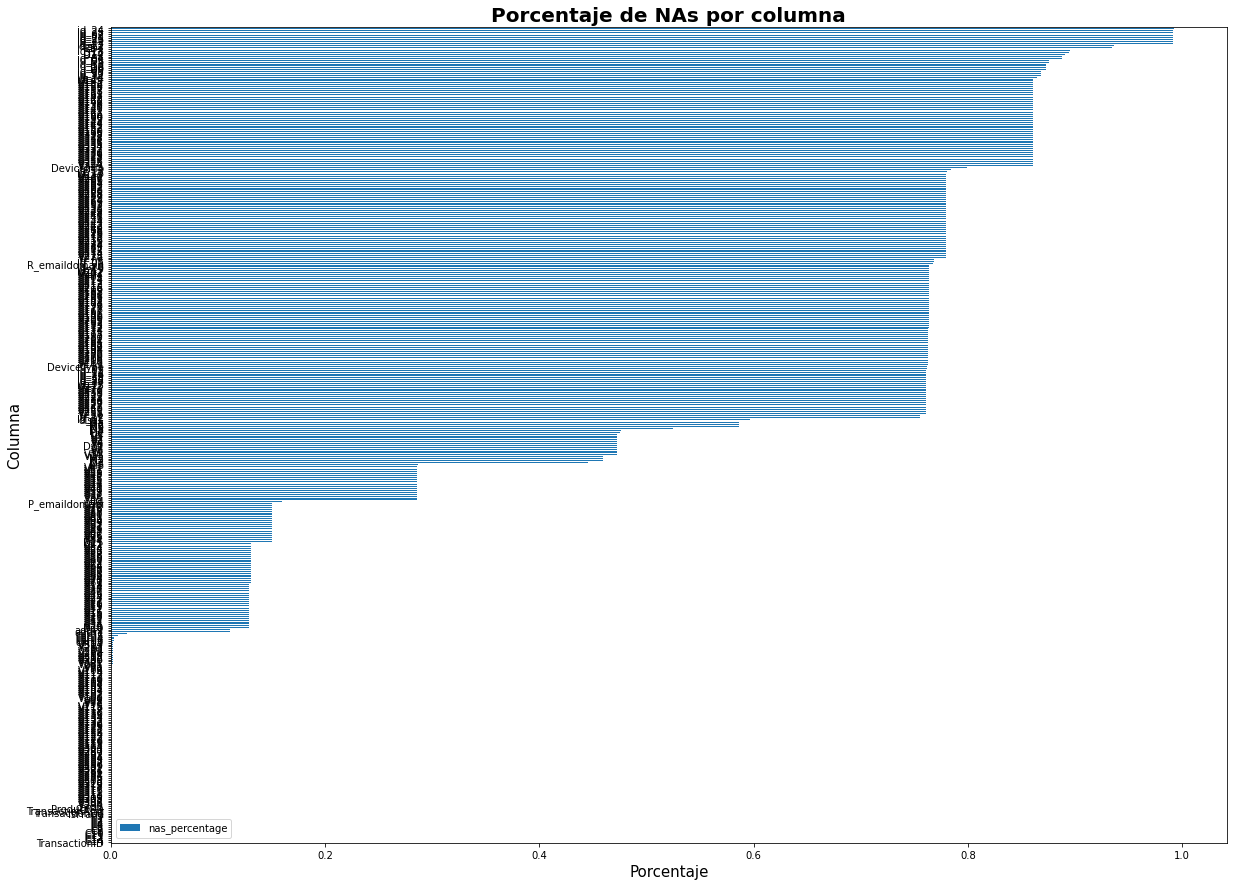

In [227]:
#Ahora vamos a ver un grafico de barras con el porcentaje de NAs por columna con matplotlib
NAs.sort_values(by='nas_percentage', ascending=True).plot.barh(x='column_name', y='nas_percentage', figsize=(20,15))
plt.title('Porcentaje de NAs por columna', fontsize=20, fontweight='bold')
plt.xlabel('Porcentaje', fontsize=15)
plt.ylabel('Columna', fontsize=15)
plt.show()

Como podemos observar hay columnas que mayoria de sus datos son NAs pero tambien hay muchas en las que se tienen pocos o ninguno, estas son las que seleccionaran para observar con mas detalle en el EDA ya que se sospecha que son las que mejor nos ayudan a detectar fraudes.

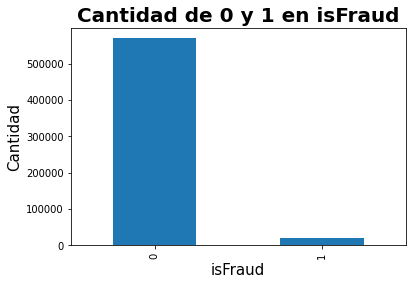

In [228]:
#La variable respuesta es isFraud, es una variable binaria, vamos a ver la cantidad de 0 y 1 a ver si esta balanceada
train_data_transactions['isFraud'].value_counts()
#Lo vemos en un histograma con matplotlib
train_data_transactions['isFraud'].value_counts().plot.bar()
plt.title('Cantidad de 0 y 1 en isFraud', fontsize=20, fontweight='bold')
plt.xlabel('isFraud', fontsize=15)
plt.ylabel('Cantidad', fontsize=15)
plt.show()

La gran mayoria de nuestras muestras son casos que no son fraudes, es posible que un modelo generado a partir de este training set solo sea capaz de detectar casos no fraudes y se le sea dificil detectar fraudes. Ahora observaremos la distribucion en el testing data set.

In [9]:
test_data_transactions.head(5)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La data de testing no tiene variable respuesta asi que es necesario generar un testing set a partir de la data de entrenamiento.

In [6]:
#Vamos a generar un set de test con el 20% de los datos de train_transactions_data
#La idea es que el set de test tenga la misma proporcion de 0 y 1 que el set de train
train_data_transactions['isFraud'].value_counts()
#Vemos que hay 20663 observaciones con 1 y 569877 observaciones con 0
#Vamos a generar un set de test con 4133 observaciones con 1 y 113975 observaciones con 0
#Para eso vamos a hacer un split con la opcion stratify
train_data_transactions['isFraud'].value_counts(normalize=True)
#Vemos que el 3.5% de las observaciones tienen 1 y el 96.5% tienen 0
#Vamos a hacer el split con la opcion stratify
tr_train, tr_test = train_test_split(train_data_transactions, test_size=0.2, random_state=42, stratify=train_data_transactions['isFraud'])

In [7]:
#Vamos a observar la proporcion de 0 y 1 en el set de train y test en un dataframe
tr_train['isFraud'].value_counts(normalize=True)
tr_test['isFraud'].value_counts(normalize=True)
print(tr_train['isFraud'].value_counts(normalize=True),tr_test['isFraud'].value_counts(normalize=True))


0    0.965011
1    0.034989
Name: isFraud, dtype: float64 0    0.965007
1    0.034993
Name: isFraud, dtype: float64


Vemos que ahora si nuestros datasets tienen informacion de ambos tipos de respuesta. Se podrian generar datos sinteticos con tecnimas como Oversampling para balancear los datos y tener una cantidad similar para ambas respuestas sin embargo lo vamos a omitir por ahora ya que solo estamos analizando los datos y no generando modelos todavia. Es posible que al momento de generar el modelo, por cuestiones de tiempo no se contemple esta opcion pero en un contexto sin restricciones de tiempo vale la pena comparar resultados.

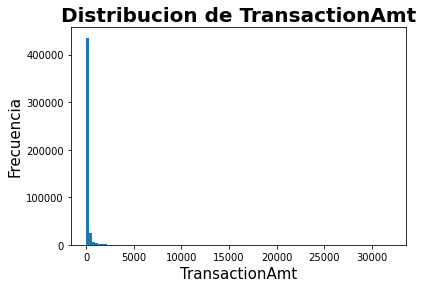

In [229]:
#Vamos analizar con mas detalle las variables TransactionAmt, ProductCD, TransactionDT, card1
#Realizemos un analisis de simetria, datos atipicos, y dispersion para cada una
#Primero vamos a ver la distribucion de TransactionAmt con matplotlib
tr_train['TransactionAmt'].plot.hist(bins=100)
plt.title('Distribucion de TransactionAmt', fontsize=20, fontweight='bold')
plt.xlabel('TransactionAmt', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.show()

Se puede evidenciar que tiene un sesgo a la derecha y es posible suponer que hay datos atipicos y la dispersion es alta.

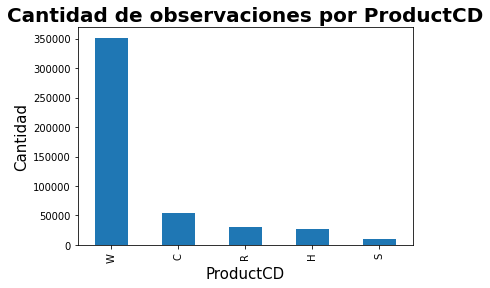

In [230]:
#Repetimos para ProductCD con matplotlib
tr_train['ProductCD'].value_counts().plot.bar()
plt.title('Cantidad de observaciones por ProductCD', fontsize=20, fontweight='bold')
plt.xlabel('ProductCD', fontsize=15)
plt.ylabel('Cantidad', fontsize=15)
plt.show()

Esta variable es categorica, con 5 diferentes respuestas, la gran mayoria es de tipo W. Ahora veamos como se relaciona cada tipo con la variable respuesta.

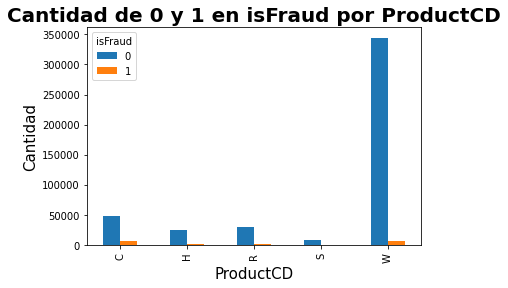

In [231]:
#Veamos como se relaciona ProductCD con isFraud con matplotlib
pd.crosstab(tr_train['ProductCD'], tr_train['isFraud']).plot.bar()
plt.title('Cantidad de 0 y 1 en isFraud por ProductCD', fontsize=20, fontweight='bold')
plt.xlabel('ProductCD', fontsize=15)
plt.ylabel('Cantidad', fontsize=15)
plt.show()

En todas las opciones hay casos fraude asi que se mantienen en el estudio. Es posible tambien que la variable no un aporte significativo a la decision.

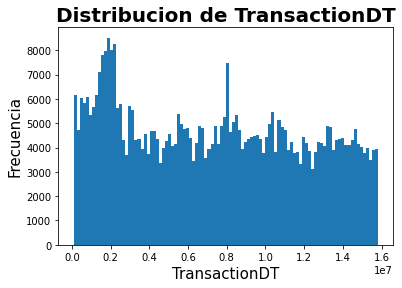

In [232]:
#Repetimos para TransactionDT con matplotlib
tr_train['TransactionDT'].plot.hist(bins=100)
plt.title('Distribucion de TransactionDT', fontsize=20, fontweight='bold')
plt.xlabel('TransactionDT', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.show()

Vemos que tiene una distribucion relativamente asimetrica y su rango de valores es enorme, es posible que dificilmente logre explicar la variable respuesta a partir de sus datos.

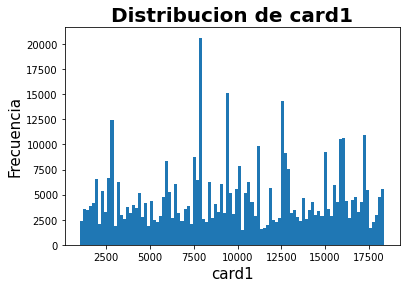

In [233]:
#Finalmente para card1 con matplotlib
tr_train['card1'].plot.hist(bins=100)
plt.title('Distribucion de card1', fontsize=20, fontweight='bold')
plt.xlabel('card1', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.show()

Podemos observar que su rango es muy amplio tambien, distribucion asimetrica y con posiblemente datos atipicos.

In [8]:
#Vamos a eliminar las columnas con mas del 70% de NAs
train_data_transactions_2 = train_data_transactions.loc[:, train_data_transactions.isnull().mean() < .7]
train_data_transactions_2.shape

(590540, 226)

In [9]:
#De nuevo ahora usamos nuestro nuevo set para train y test
train_data_transactions_2['isFraud'].value_counts()
train_data_transactions_2['isFraud'].value_counts(normalize=True)
tr_train_2, tr_test_2 = train_test_split(train_data_transactions_2, test_size=0.2, random_state=42, stratify=train_data_transactions_2['isFraud'])

In [10]:
#Ahora vamos a realizar imputacion de faltantes con la mediana en las columnas de tr_train_2
#Usemos impute() de sklearn para imputar los faltantes
imputer = SimpleImputer(strategy='median')
#Vamos a filtrar las columnas numericas del set
tr_train_2_num = tr_train_2.select_dtypes(include=['float64','int64'])
#Ahora vamos a imputar los faltantes
imputer.fit(tr_train_2_num)
tr_train_2_num_imp = imputer.transform(tr_train_2_num)

In [11]:
#Ahora usamos los valores de tr_train_2_num_imp para reemplazar las columnas numericas de tr_train_2
tr_train_2_num_imp_df = pd.DataFrame(tr_train_2_num_imp, columns=tr_train_2_num.columns)
#Ahora tr_train_2 le agregamos las columnas numericas imputadas
tr_train_2 = tr_train_2.drop(columns=tr_train_2_num.columns)
tr_train_2 = tr_train_2.merge(tr_train_2_num_imp_df, left_index=True, right_index=True)

In [12]:
#Repetimos el proceso para testing
tr_test_2_num = tr_test_2.select_dtypes(include=['float64','int64'])
imputer.fit(tr_test_2_num)
tr_test_2_num_imp = imputer.transform(tr_test_2_num)
tr_test_2_num_imp_df = pd.DataFrame(tr_test_2_num_imp, columns=tr_test_2_num.columns)
tr_test_2 = tr_test_2.drop(columns=tr_test_2_num.columns)
tr_test_2 = tr_test_2.merge(tr_test_2_num_imp_df, left_index=True, right_index=True)

In [13]:
#Ahora hacemos un analisis de correlacion entre las variables de tr_train_2 
#Primero vamos a filtrar las columnas numericas y sin incluir isFraud
tr_train_2_num_corr = tr_train_2_num.drop(columns=['isFraud'])
#Ahora vamos a ver la correlacion entre las variables
tr_train_2_num_corr.corr()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
TransactionID,1.000000,0.998280,0.012247,0.009052,-0.019369,-0.010626,-0.023389,-0.000902,0.056286,-0.028635,...,0.038697,0.029072,0.042493,0.028880,0.057764,0.056432,0.062696,0.017587,0.052934,0.039374
TransactionDT,0.998280,1.000000,0.012163,0.009557,-0.018673,-0.011793,-0.023637,-0.000576,0.051086,-0.028938,...,0.038928,0.028642,0.042564,0.028242,0.060126,0.058749,0.065319,0.018302,0.054955,0.040879
TransactionAmt,0.012247,0.012163,1.000000,-0.005959,0.015969,-0.109148,0.001496,-0.008658,0.027737,0.024938,...,0.103422,0.188066,0.145969,0.174331,0.013932,0.010876,0.013933,0.127611,0.102201,0.119556
card1,0.009052,0.009557,-0.005959,1.000000,0.003456,0.004068,-0.092662,0.020058,-0.000179,0.004999,...,0.005822,0.002300,0.012435,0.000875,0.045871,0.050707,0.051874,0.009020,0.036245,0.025729
card2,-0.019369,-0.018673,0.015969,0.003456,1.000000,0.025094,0.030027,0.030028,-0.022354,-0.014372,...,0.001238,-0.000363,0.004628,0.001120,0.029266,0.031910,0.032666,0.015716,0.030406,0.025467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V317,0.056432,0.058749,0.010876,0.050707,0.031910,-0.016395,-0.093664,0.014347,-0.003121,0.019272,...,0.222431,0.048310,0.186796,0.046652,0.909175,1.000000,0.968438,0.132213,0.590630,0.378573
V318,0.062696,0.065319,0.013933,0.051874,0.032666,-0.014966,-0.098958,0.015853,0.001599,0.014299,...,0.231721,0.054354,0.195217,0.050700,0.939396,0.968438,1.000000,0.144186,0.617874,0.408474
V319,0.017587,0.018302,0.127611,0.009020,0.015716,-0.014116,-0.018457,0.004619,0.003748,0.006956,...,0.052643,0.036706,0.048612,0.030407,0.135677,0.132213,0.144186,1.000000,0.788243,0.920414
V320,0.052934,0.054955,0.102201,0.036245,0.030406,-0.023520,-0.066935,0.010030,0.004369,0.013284,...,0.195654,0.065002,0.163226,0.062674,0.550614,0.590630,0.617874,0.788243,1.000000,0.938065


In [14]:
matriz_correlacion = tr_train_2_num_corr.corr()

In [15]:
#Quiero contar la cantidad de nan o infs en matriz_correlacion
np.isnan(matriz_correlacion).sum().sum()
#Remplazar los nan con 0 en matriz_correlacion para poder usar VIF
matriz_correlacion = matriz_correlacion.fillna(0)

In [16]:
#Vamos a realizar el calculo de VIF para cada variable
#Primero vamos a crear un dataframe con las variables y su VIF
vif = pd.DataFrame()
vif["variables"] = matriz_correlacion.columns
#Ahora calculamos el VIF para cada variable
vif["VIF"] = [variance_inflation_factor(matriz_correlacion.values, i) for i in range(matriz_correlacion.shape[1])]
#Ahora revisamos si la mas alta es mayor a 5
vif.sort_values(by='VIF', ascending=False).head(5)

,variables,VIF
165,V134,6.042497e+09
208,V318,3.898242e+09
163,V132,3.861261e+09
206,V316,2.975545e+09
196,V306,2.564640e+09


In [17]:
#Vamos a contar cuantas variables tienen VIF mayor a 5
vif[vif['VIF'] > 5].shape[0]

211

Al observar que el VIF es tan grande en todas las variables, se puede asumir que debido a la gran cantidad de variables y sus valores de correlacion, es mejor manualmente revisar las correlaciones y hacer una filtracion mas manual con fines de continuar el estudio.

In [18]:
#Vamos a mirar el par de columnas con correlacion arriba de 0.95
#Vamos a crear una lista con las columnas que tienen correlacion arriba de 0.95
columnas_correlacion = []
columnas_primera = []
for i in range(len(matriz_correlacion.columns)):
    for j in range(i):
        if abs(matriz_correlacion.iloc[i, j]) > 0.95:
            columna1 = matriz_correlacion.columns[i]
            columna2 = matriz_correlacion.columns[j]
            columna = str(columna1) + ' - ' + str(columna2)
            columnas_correlacion.append(columna)
            columnas_primera.append(columna1)

In [19]:
#Vamos a ver el tamaño de la lista
len(columnas_correlacion)

184

In [20]:
#Hay 183 pares, vamos a revisar las variables mas repetidas en los pares
#Vamos a contar las repeticiones de cada valor unico en columnas_primera
from collections import Counter
Counter(columnas_primera)
#Ordenamos de mayor a menor
Counter(columnas_primera).most_common()

[('V318', 13),
 ('V308', 11),
 ('V295', 9),
 ('V280', 8),
 ('V134', 7),
 ('V316', 7),
 ('C11', 6),
 ('V133', 6),
 ('V306', 6),
 ('V317', 6),
 ('C10', 5),
 ('V128', 5),
 ('V293', 5),
 ('V307', 5),
 ('C8', 4),
 ('V127', 4),
 ('V279', 4),
 ('C6', 3),
 ('C12', 3),
 ('C14', 3),
 ('V84', 3),
 ('V92', 3),
 ('V94', 3),
 ('V103', 3),
 ('V132', 3),
 ('V299', 3),
 ('C4', 2),
 ('V50', 2),
 ('V71', 2),
 ('V102', 2),
 ('V126', 2),
 ('V298', 2),
 ('TransactionDT', 1),
 ('C2', 1),
 ('D2', 1),
 ('V11', 1),
 ('V16', 1),
 ('V18', 1),
 ('V21', 1),
 ('V22', 1),
 ('V28', 1),
 ('V30', 1),
 ('V32', 1),
 ('V33', 1),
 ('V34', 1),
 ('V43', 1),
 ('V49', 1),
 ('V52', 1),
 ('V57', 1),
 ('V58', 1),
 ('V60', 1),
 ('V63', 1),
 ('V70', 1),
 ('V72', 1),
 ('V74', 1),
 ('V81', 1),
 ('V88', 1),
 ('V89', 1),
 ('V91', 1),
 ('V93', 1),
 ('V97', 1),
 ('V101', 1),
 ('V106', 1),
 ('V292', 1),
 ('V296', 1),
 ('V304', 1)]

In [21]:
#Vamos a crear una lista con las columnas que vamos a eliminar, todas las que tengan mas de 3 repeticiones
columnas_eliminar = []
for i in range(len(Counter(columnas_primera).most_common())):
    if Counter(columnas_primera).most_common()[i][1] > 3:
        columnas_eliminar.append(Counter(columnas_primera).most_common()[i][0])

In [22]:
columnas_eliminar

['V318',
 'V308',
 'V295',
 'V280',
 'V134',
 'V316',
 'C11',
 'V133',
 'V306',
 'V317',
 'C10',
 'V128',
 'V293',
 'V307',
 'C8',
 'V127',
 'V279']

In [23]:
#Vamos a agregar las columnas que no sean numericas a la lista de columnas a eliminar
#Miremos que columnas no tienen type float o int
no_numericas = list(tr_train_2.select_dtypes(exclude=['float64','int64']).columns)
no_numericas

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

Esta decision se tomo debido a un error durante el proceso del Pipeline, usando OneHotEncoding para estas variables. No era posible realizarlo implementado en un GridSearch y por motivos del examen se decidio continuar de esta manera y analizar los resultados obtenidos asi. Dado el caso que no sean buenos se visita retomarlos. 

In [24]:
#Agregamos no_numericas a columnas_eliminar
columnas_eliminar = columnas_eliminar + no_numericas

In [25]:
#Eliminamos las columnas de tr_train_2 y tr_test_2
tr_train_2 = tr_train_2.drop(columns=columnas_eliminar)
tr_test_2 = tr_test_2.drop(columns=columnas_eliminar)

In [26]:
tr_train_2.shape

(378060, 196)

In [27]:
tr_test_2.shape

(23668, 196)

Con estos datos vamos a generar nuestros modelos. 

In [33]:
tr_train_2.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V309,V310,V311,V312,V313,V314,V315,V319,V320,V321
40809,3115448.0,0.0,2562600.0,107.95,6530.0,206.0,150.0,166.0,485.0,87.0,...,0.0,500.799988,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
285886,3298993.0,0.0,7766224.0,554.00,6394.0,225.0,150.0,224.0,203.0,87.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
104256,3055194.0,0.0,1542937.0,20.00,11275.0,420.0,150.0,195.0,315.0,87.0,...,0.0,65.000000,0.0,0.000000,50.0,65.000000,65.000000,0.0,0.0,0.0
196382,3311349.0,0.0,8020102.0,19.50,7919.0,194.0,150.0,166.0,272.0,87.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
175534,3541183.0,0.0,14657461.0,47.95,6550.0,361.0,150.0,226.0,184.0,87.0,...,0.0,73.900002,0.0,25.950001,0.0,73.900002,47.950001,0.0,0.0,0.0


## Wind Speed

In [41]:
#Vamos a leer los datos para wind speed
train_wind = pd.read_csv("data_treino_dv_df_2000_2010.csv")
test_wind = pd.read_csv("data_teste_dv_df_2011.csv")

#Vemos las primeras 5 filas de train_wind
train_wind.head(5)

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


In [42]:
#Vemos la cantidad de observaciones que tenemos
train_wind.shape

(87693, 13)

In [50]:
#Vamos a cambiar el nombre de las columnas para que sean mas faciles de usar
#Hora se queda igual, vamos a cambiar las demas
#La segunda pongamosle Direccion
#La tercera pongamosle Velocidad
#La cuarta pongamosle Humedad Min
#La quinta pongamosle Humedad Max
#La sexta pongamosle Temperatura Max
#La septima pongamosle Temperatura Min
#La octava pongamosle Humedad Relativa
#La novena pongamosle Presion Atmosferica
#La decima pongamosle Precipitacion
#La decima primera pongamosle Rajada Maxima
#La decima segunda pongamosle Presion Maxima
#La decima tercera pongamosle Presion Minima
#Ejecutamos cambios en una copia
train_wind_2 = train_wind.copy()
train_wind_2.columns = ['Hora', 'Direccion', 'Velocidad', 'Humedad Min', 'Humedad Max', 'Temperatura Max', 'Temperatura Min', 'Humedad Relativa', 'Presion Atmosferica', 'Precipitacion', 'Rajada Maxima', 'Presion Maxima', 'Presion Minima']

In [52]:
#Vemos el tipo de datos que tenemos
train_wind_2.dtypes

Hora                    object
Direccion              float64
Velocidad              float64
Humedad Min            float64
Humedad Max            float64
Temperatura Max        float64
Temperatura Min        float64
Humedad Relativa       float64
Presion Atmosferica    float64
Precipitacion          float64
Rajada Maxima          float64
Presion Maxima         float64
Presion Minima         float64
dtype: object

In [53]:
#Vamos a revisar la media, desviacion estandar, minimo, maximo y cuartiles
train_wind_2.describe()

,Direccion,Velocidad,Humedad Min,Humedad Max,Temperatura Max,Temperatura Min,Humedad Relativa,Presion Atmosferica,Precipitacion,Rajada Maxima,Presion Maxima,Presion Minima
count,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000
mean,0.405810,2.466192,69.058465,63.176194,21.921264,20.684570,66.146682,887.251925,0.160907,5.161076,887.580724,886.891093
std,0.686247,1.313968,19.640222,20.166336,3.721386,3.513744,19.992327,4.012404,1.307515,2.311157,3.646750,3.564539
min,-1.000000,0.000000,12.000000,10.000000,9.200000,8.400000,10.000000,863.400000,0.000000,0.000000,865.300000,862.800000
25%,-0.156434,1.500000,54.000000,48.000000,19.200000,18.400000,51.000000,885.300000,0.000000,3.400000,885.600000,885.000000
50%,0.788011,2.400000,72.000000,64.000000,21.400000,20.200000,68.000000,887.200000,0.000000,5.000000,887.500000,886.900000
75%,0.970296,3.400000,87.000000,80.000000,24.700000,23.100000,84.000000,889.100000,0.000000,6.800000,889.300000,888.800000
max,1.000000,10.000000,100.000000,98.000000,35.300000,34.400000,99.000000,1023.500000,70.800000,24.300000,913.100000,910.900000


In [55]:
#Ahora haremos un conteo de NAs
train_wind_2.isnull().sum()

Hora                   0
Direccion              0
Velocidad              0
Humedad Min            0
Humedad Max            0
Temperatura Max        0
Temperatura Min        0
Humedad Relativa       0
Presion Atmosferica    0
Precipitacion          0
Rajada Maxima          0
Presion Maxima         0
Presion Minima         0
dtype: int64

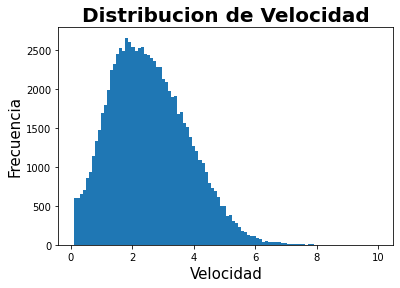

In [234]:
#La variable respuesta Velocidad, es una variable continua, vamos a ver su distribucion con matplotlib
train_wind_2['Velocidad'].plot.hist(bins=100)
plt.title('Distribucion de Velocidad', fontsize=20, fontweight='bold')
plt.xlabel('Velocidad', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.show()

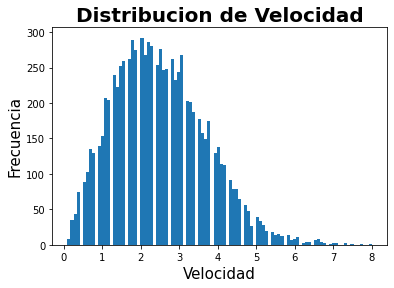

In [235]:
#Vamos a hacer el mismo cambio de columnas en test_wind
test_wind_2 = test_wind.copy()
test_wind_2.columns = ['Hora', 'Direccion', 'Velocidad', 'Humedad Min', 'Humedad Max', 'Temperatura Max', 'Temperatura Min', 'Humedad Relativa', 'Presion Atmosferica', 'Precipitacion', 'Rajada Maxima', 'Presion Maxima', 'Presion Minima']
#Ahora vemos la distribucion de la variable respuesta en test_wind_2 con matplotlib
test_wind_2['Velocidad'].plot.hist(bins=100)
plt.title('Distribucion de Velocidad', fontsize=20, fontweight='bold')
plt.xlabel('Velocidad', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.show()

Podemos ver que es un comportamiento similar, cambia la magnitud de repeticiones por valor debido a la menor cantidad de observaciones. La gran diferencia es la cantidad de observaciones con velocidad 0, en training hay muchos casos. La velocidad del viento nunca debe ser exactamente 0 entonces se van a asumir como Nans.

In [60]:
#Vamos a contar los 0 en la variable Respuesta en train_wind_2
#Solo contamos los 0
train_wind_2['Velocidad'].value_counts()[0]

2178

In [61]:
#Eliminamos las observaciones con 0 de Velocidad en train_wind_2
train_wind_2 = train_wind_2[train_wind_2['Velocidad'] != 0]
#Reset el index
train_wind_2 = train_wind_2.reset_index(drop=True)

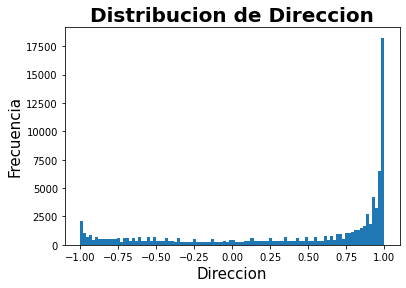

In [236]:
#Ahora vamos a escoger 4 columnas para analizar su comportamiento con la variable respuesta
#Direccion, Precipitacion, Presion Atmosferica, Humedad Relativa
#Primero vamos a ver la distribucion de Direccion con matplotlib
train_wind_2['Direccion'].plot.hist(bins=100)
plt.title('Distribucion de Direccion', fontsize=20, fontweight='bold')
plt.xlabel('Direccion', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.show()

Vemos que mayoria de los datos estan en el extremos derecho, es decir que es posible que nuestra prediccion se vea fuertemente afectada por una direccion del viento y no ambas.

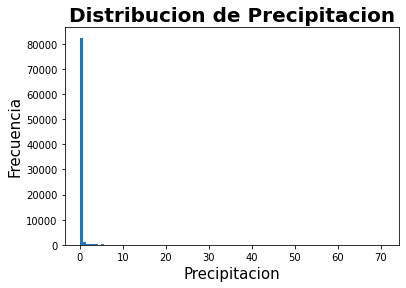

In [237]:
#Ahora vamos a ver la distribucion de Precipitacion con matplotlib
train_wind_2['Precipitacion'].plot.hist(bins=100)
plt.title('Distribucion de Precipitacion', fontsize=20, fontweight='bold')
plt.xlabel('Precipitacion', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.show()

La gran mayoria de nuestros datos tienen la misma precipitacion, 0, lo cual nos puede decir que no es algo relevante en este caso para la velocidad del viento.

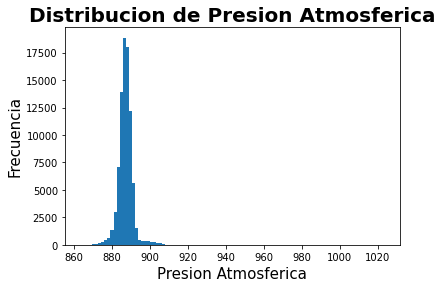

In [238]:
#Ahora vamos a ver la distribucion de Presion Atmosferica con matplotlib
train_wind_2['Presion Atmosferica'].plot.hist(bins=100)
plt.title('Distribucion de Presion Atmosferica', fontsize=20, fontweight='bold')
plt.xlabel('Presion Atmosferica', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.show()

En este caso vemos que es muy parecida a una distribucion normal, lo cual nos puede llevar a pensar que su diversidad en valores puede verse reflejada en nuestras predicciones, veamos como se comporta comparando con la variable respuesta.

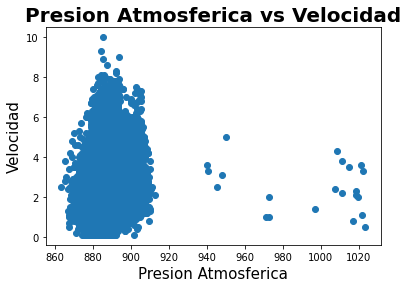

In [239]:
#Vamos a ver Presion Atmosferica vs Velocidad con matplotlib
plt.scatter(train_wind_2['Presion Atmosferica'], train_wind_2['Velocidad'])
plt.title('Presion Atmosferica vs Velocidad', fontsize=20, fontweight='bold')
plt.xlabel('Presion Atmosferica', fontsize=15)
plt.ylabel('Velocidad', fontsize=15)
plt.show()

No es posible evidenciar un patron que relacione ambas variables, vemos que hay muchas velocidades para presiones altas y bajar, los pocos puntos extremos a la derecha podrian ser outliers.

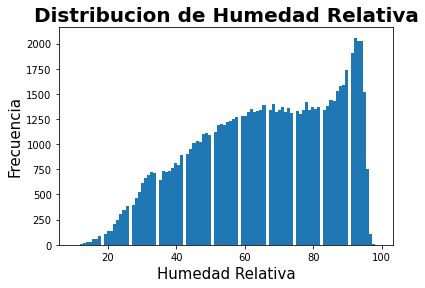

In [240]:
#Ahora veamos la distribucion de Humedad Relativa con matplotlib
train_wind_2['Humedad Relativa'].plot.hist(bins=100)
plt.title('Distribucion de Humedad Relativa', fontsize=20, fontweight='bold')
plt.xlabel('Humedad Relativa', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)
plt.show()

Vemos que esta sesgada a la izquierda relativamente. No se puede hacer ninguna conclusion unicamente viendo esto, veamos con respecto a la velocidad.

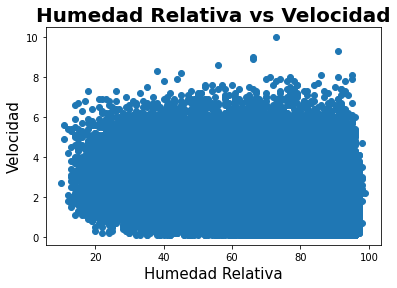

In [241]:
#Vamos a ver Humedad Relativa vs Velocidad con matplotlib
plt.scatter(train_wind_2['Humedad Relativa'], train_wind_2['Velocidad'])
plt.title('Humedad Relativa vs Velocidad', fontsize=20, fontweight='bold')
plt.xlabel('Humedad Relativa', fontsize=15)
plt.ylabel('Velocidad', fontsize=15)
plt.show()

Un balance entre todo tipo de respuesta para todo tipo de valor, tampoco podemos ver un patron o alguna indicacion de relacion entre ellas.

In [68]:
#Ahora hagamos un analisis de correlacion entre las variables de train_wind_2 sin incluir la variable respuesta
#Primero vamos a filtrar las columnas numericas y sin incluir Velocidad
train_wind_2_num = train_wind_2.select_dtypes(include=['float64','int64'])
train_wind_2_num_corr = train_wind_2_num.drop(columns=['Velocidad'])
#Ahora vamos a ver la correlacion entre las variables
wind_corr_matrix = train_wind_2_num_corr.corr()
wind_corr_matrix

,Direccion,Humedad Min,Humedad Max,Temperatura Max,Temperatura Min,Humedad Relativa,Presion Atmosferica,Precipitacion,Rajada Maxima,Presion Maxima,Presion Minima
Direccion,1.000000,-0.326667,-0.302374,-0.012953,-0.013646,-0.326705,0.315755,-0.079645,0.146310,0.340376,0.352621
Humedad Min,-0.326667,1.000000,0.976785,-0.631264,-0.620211,0.984132,-0.198858,0.153376,-0.294332,-0.255968,-0.247689
Humedad Max,-0.302374,0.976785,1.000000,-0.682356,-0.634072,0.983185,-0.195350,0.121833,-0.323942,-0.257320,-0.240975
Temperatura Max,-0.012953,-0.631264,-0.682356,1.000000,0.974334,-0.656647,-0.061698,-0.040625,0.360628,-0.009466,-0.044401
Temperatura Min,-0.013646,-0.620211,-0.634072,0.974334,1.000000,-0.627314,-0.087847,-0.080528,0.326173,-0.043007,-0.068592
Humedad Relativa,-0.326705,0.984132,0.983185,-0.656647,-0.627314,1.000000,-0.222388,0.158464,-0.310587,-0.285112,-0.272718
Presion Atmosferica,0.315755,-0.198858,-0.195350,-0.061698,-0.087847,-0.222388,1.000000,-0.074028,0.140169,0.880074,0.884014
Precipitacion,-0.079645,0.153376,0.121833,-0.040625,-0.080528,0.158464,-0.074028,1.000000,0.124105,-0.066247,-0.085072
Rajada Maxima,0.146310,-0.294332,-0.323942,0.360628,0.326173,-0.310587,0.140169,0.124105,1.000000,0.187934,0.167328
Presion Maxima,0.340376,-0.255968,-0.257320,-0.009466,-0.043007,-0.285112,0.880074,-0.066247,0.187934,1.000000,0.964624


In [70]:
#Vamos a contar la cantidad de nans e infs en wind_corr_matrix
np.isnan(wind_corr_matrix).sum().sum()
#Remplazar nan con 0s con el fin de usar VIF
wind_corr_matrix = wind_corr_matrix.fillna(0)

In [71]:
#Vamos a realizar el calculo de VIF para cada variable
#Primero vamos a crear un dataframe con las variables y su VIF
vif = pd.DataFrame()
vif["variables"] = wind_corr_matrix.columns
#Ahora calculamos el VIF para cada variable
vif["VIF"] = [variance_inflation_factor(wind_corr_matrix.values, i) for i in range(wind_corr_matrix.shape[1])]
#Ahora revisamos si la mas alta es mayor a 5
vif.sort_values(by='VIF', ascending=False).head(5)

,variables,VIF
2,Humedad Max,64818.385031
1,Humedad Min,61427.813095
3,Temperatura Max,49380.443041
4,Temperatura Min,39118.395794
5,Humedad Relativa,16640.302772


In [73]:
#Miramos cuantas columnas tienen un VIF mayor a 5
vif[vif['VIF'] > 5].shape[0]
#El porcentaje de columnas con VIF mayor a 5
vif[vif['VIF'] > 5].shape[0]/vif.shape[0]

0.9090909090909091

Al ver esto, es posible un error de calculo y no vale la pena eliminar el 90% de nuestras variables. Mejor llevemos a cabo el analisis de correlacion de otra manera.

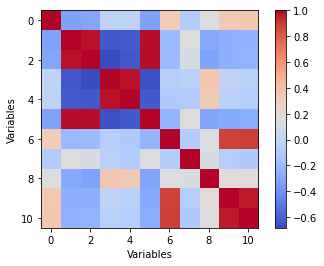

In [243]:
#Veamos un heatmap usando px para ver la correlacion entre las variables con matplotlib
# Create a figure
fig, ax = plt.subplots()

# Set the axes labels
ax.set_xlabel('Variables')
ax.set_ylabel('Variables')

# Create the heatmap
heatmap = ax.imshow(wind_corr_matrix, cmap='coolwarm')

# Add a colorbar
plt.colorbar(heatmap)

# Show the heatmap
plt.show()

De esto podemos observar que los valores altos de correlacion se encuentran entre las variables que si estan relacionadas, por ejemplo la Humedad Relativa con sus valores maximos y minimos, lo mismo sucede con la Presion Atmosferica. Podemos reducir la complejidad eliminando los valores maximos y minimos de estas variables y lograr nuestros objetivos con menos columnas.

In [75]:
#Vamos a eliminar las columnas Humedad Max, Humedad Min, Presion Maxima, y Presion Minima
train_wind_2 = train_wind_2.drop(columns=['Humedad Max', 'Humedad Min', 'Presion Maxima', 'Presion Minima'])

In [76]:
#Ahora veamos nuestro test_wind_2 y eliminamos las mismas columnas
test_wind_2 = test_wind_2.drop(columns=['Humedad Max', 'Humedad Min', 'Presion Maxima', 'Presion Minima'])

In [78]:
#Comparamos tamaños de train_wind_2 y test_wind_2
train_wind_2.shape

(85515, 9)

In [79]:
test_wind_2.shape

(8726, 9)

Con estos datos vamos a llevar a cabo nuestro modelo de Regresion para pronosticar Velocidad.

# Modelo de Regresion

In [80]:
#Veamos cuantas observaciones tenemos para cada valor de la columna Hora
train_wind_2['Hora'].value_counts()

20:00    3674
18:00    3672
16:00    3666
17:00    3665
15:00    3662
19:00    3660
14:00    3647
13:00    3641
12:00    3633
22:00    3624
21:00    3623
23:00    3605
01:00    3588
00:00    3569
11:00    3557
02:00    3544
03:00    3515
04:00    3479
05:00    3452
10:00    3431
06:00    3430
07:00    3413
08:00    3403
09:00    3362
Name: Hora, dtype: int64

Vamos a generar un set de train con las primeras 24 observaciones y un test para las segundas 24 observaciones. La idea es tener datos de un dia para entrenar y datos de otro dia para testear. A partir de un dia pronosticar el siguiente. Luego la idea is pasar a las primeras 48 observaciones para train y las 24 siguientes para test. Ir aumentando asi hasta tener un train de 360 observaciones que representan 15 dias y un test de 24 observaciones que representan 1 dia.

In [106]:
#Vamos a generar un set de train con las primeras 24 observaciones y un test para las segundas 24 observaciones
#La idea es tener datos de un dia para entrenar y datos de otro dia para testear
#A partir de un dia pronosticar el siguiente
#Luego la idea is pasar a las primeras 48 observaciones para train y las 24 siguientes para test
#Ir aumentando asi hasta tener un train de 168 observaciones que representan 7 dias y un test de 24 observaciones que representan 1 dia
#Vamos a evaluar para los siguientes modelos: KNN, Ridge, Lasso, XGBoost, SVM, MLP
#Vamos a crear un dataframe resultados_regression para guardar los mejores resultados de cada modelo
#Las columnas son Modelo, MAPE, RMSE, y R2
resultados_regression = pd.DataFrame(columns=['Modelo', 'MAPE', 'RMSE', 'R2'])
#Vamos a crear un ciclo que hace cada modelo cambiando el tamaño de train y el que mejor RMSE tenga lo guardamos en resultados_regression
#Por ejemplo si el KNN con train de 48 observaciones tiene el mejor RMSE, guardamos bajo la columna modelo "KNN 48" y sus valores de desempeño en el resto


La columna hora la vamos a cambiar empezando en 12:00 por 1, significa que es la primera hora del dia. De esa manera podemos tratar la columna como variable de pronostico. 

In [112]:
#Haremos una copia de train_wind_2 para poder hacer cambios sin afectar el original
train_wind_3 = train_wind_2.copy()
#La columna Hora empieza con valores 12:00 y le corresponde a 1, luego 13:00 le corresponde a 2, etc
#Vamos a cambiar los valores de Hora para que empiecen en 1 hasta 24
#Primero vamos a crear una lista con los valores de Hora
horas = list(train_wind_3['Hora'].value_counts().index)
#Vamos a quitarle el :00 y nos quedamos solo con los primeros dos digitos de la hora
horas_2 = []
for i in range(len(horas)):
    horas_2.append(horas[i][0:2])
horas_2
#Vamos a cambiar los valores de Hora
train_wind_3['Hora'] = train_wind_3['Hora'].replace(horas, horas_2)

In [117]:
#Repetimos el proceso para test_wind_2
test_wind_3 = test_wind_2.copy()
horas = list(test_wind_3['Hora'].value_counts().index)
horas_2 = []
for i in range(len(horas)):
    horas_2.append(horas[i][0:2])
test_wind_3['Hora'] = test_wind_3['Hora'].replace(horas, horas_2)

In [118]:
#Ahora volvemos Hora a numericas
train_wind_3['Hora'] = pd.to_numeric(train_wind_3['Hora'])
test_wind_3['Hora'] = pd.to_numeric(test_wind_3['Hora'])

In [114]:
#Comenzemos con KNN 
#Primero vamos a importar KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
#Vamos a crear un dataframe para guardar los resultados de KNN
resultados_knn = pd.DataFrame(columns=['Train', 'Test', 'RMSE'])
#Vamos a crear un ciclo que hace KNN para cada tamaño de train
#Vamos a usar un tamaño de train de 24 a 168
#Vamos a usar un tamaño de test de 24
#Vamos a guardar el RMSE de cada modelo en resultados_knn
#Comenzemos
for i in [24,48,72,96,120,144,168]:
    #Primero vamos a crear el set de train y test
    train = train_wind_3.iloc[:i, :]
    test = train_wind_3.iloc[i:i+24, :]
    #Ahora vamos a crear X_train, y_train, X_test, y_test
    X_train = train.drop(columns=['Velocidad'])
    y_train = train['Velocidad']
    X_test = test.drop(columns=['Velocidad'])
    y_test = test['Velocidad']
    #Ahora vamos a crear el modelo
    knn = KNeighborsRegressor()
    #Ahora vamos a entrenar el modelo
    knn.fit(X_train, y_train)
    #Ahora vamos a predecir
    y_pred = knn.predict(X_test)
    #Ahora vamos a calcular el RMSE
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    #Ahora vamos a guardar el resultado en resultados_knn
    resultados_knn = resultados_knn.append({'Train': i, 'Test': 24, 'RMSE': rmse}, ignore_index=True)

In [116]:
resultados_knn

,Train,Test,RMSE
0,24.0,24.0,1.033957
1,48.0,24.0,0.639127
2,72.0,24.0,0.910741
3,96.0,24.0,0.880360
4,120.0,24.0,0.826892
5,144.0,24.0,0.936340
6,168.0,24.0,1.132343


In [119]:
#Escogemos el mejor RMSE y con ese hacemos el modelo final para KNN y lo guardamos en resultados_regression
#El RMSE mas bajo fue con train de 48 observaciones
#Vamos a crear el set de train y test
train = train_wind_3.iloc[:48, :]
#Usamos los primeros 24 de test_wind_2 para test
test = test_wind_3.iloc[:24, :]
#Ahora vamos a crear X_train, y_train, X_test, y_test
X_train = train.drop(columns=['Velocidad'])
y_train = train['Velocidad']
X_test = test.drop(columns=['Velocidad'])
y_test = test['Velocidad']
#Ahora vamos a crear el modelo
knn = KNeighborsRegressor()
#Ahora vamos a entrenar el modelo
knn.fit(X_train, y_train)
#Ahora vamos a predecir
y_pred = knn.predict(X_test)

In [120]:
#Calculamos el desempeño para guardar resultados en resultados_regression
#Calculamos MAPE
mape = np.mean(np.abs((y_test - y_pred)/y_test))
#Calculamos RMSE
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
#Calculamos R2
r2 = knn.score(X_test, y_test)
#Guardamos en resultados_regression
resultados_regression = resultados_regression.append({'Modelo': 'KNN 48', 'MAPE': mape, 'RMSE': rmse, 'R2': r2}, ignore_index=True)

In [121]:
#Ahora vamos a revisar Ridge
#Primero vamos a importar Ridge
from sklearn.linear_model import Ridge
#Vamos a crear un dataframe para guardar los resultados de Ridge
resultados_ridge = pd.DataFrame(columns=['Train', 'Test', 'RMSE'])
#Vamos a crear un ciclo que hace Ridge para cada tamaño de train
#Vamos a usar un tamaño de train de 24 a 168
#Vamos a usar un tamaño de test de 24
#Vamos a guardar el RMSE de cada modelo en resultados_ridge
#Comenzemos
for i in [24,48,72,96,120,144,168]:
    #Primero vamos a crear el set de train y test
    train = train_wind_3.iloc[:i, :]
    test = train_wind_3.iloc[i:i+24, :]
    #Ahora vamos a crear X_train, y_train, X_test, y_test
    X_train = train.drop(columns=['Velocidad'])
    y_train = train['Velocidad']
    X_test = test.drop(columns=['Velocidad'])
    y_test = test['Velocidad']
    #Ahora vamos a crear el modelo
    ridge = Ridge()
    #Ahora vamos a entrenar el modelo
    ridge.fit(X_train, y_train)
    #Ahora vamos a predecir
    y_pred = ridge.predict(X_test)
    #Ahora vamos a calcular el RMSE
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    #Ahora vamos a guardar el resultado en resultados_ridge
    resultados_ridge = resultados_ridge.append({'Train': i, 'Test': 24, 'RMSE': rmse}, ignore_index=True)

In [122]:
resultados_ridge

,Train,Test,RMSE
0,24.0,24.0,0.490990
1,48.0,24.0,0.458227
2,72.0,24.0,0.449504
3,96.0,24.0,0.394707
4,120.0,24.0,0.429247
5,144.0,24.0,0.505533
6,168.0,24.0,0.591741


In [123]:
#El menor fue con train de 96 observaciones
#Vamos a crear el set de train y test
train = train_wind_3.iloc[:96, :]
#Usamos los primeros 24 de test_wind_2 para test
test = test_wind_3.iloc[:24, :]
#Ahora vamos a crear X_train, y_train, X_test, y_test
X_train = train.drop(columns=['Velocidad'])
y_train = train['Velocidad']
X_test = test.drop(columns=['Velocidad'])
y_test = test['Velocidad']
#Ahora vamos a crear el modelo
ridge = Ridge()
#Ahora vamos a entrenar el modelo
ridge.fit(X_train, y_train)
#Ahora vamos a predecir
y_pred = ridge.predict(X_test)

In [124]:
#Calculamos el desempeño para guardar resultados en resultados_regression
#Calculamos MAPE
mape = np.mean(np.abs((y_test - y_pred)/y_test))
#Calculamos RMSE
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
#Calculamos R2
r2 = ridge.score(X_test, y_test)
#Guardamos en resultados_regression
resultados_regression = resultados_regression.append({'Modelo': 'Ridge 96', 'MAPE': mape, 'RMSE': rmse, 'R2': r2}, ignore_index=True)

In [126]:
#Ahora vamos a revisar Lasso
#Primero vamos a importar Lasso
from sklearn.linear_model import Lasso
#Vamos a crear un dataframe para guardar los resultados de Lasso
resultados_lasso = pd.DataFrame(columns=['Train', 'Test', 'RMSE'])
#Vamos a crear un ciclo que hace Lasso para cada tamaño de train
#Vamos a usar un tamaño de train de 24 a 168
#Vamos a usar un tamaño de test de 24
#Vamos a guardar el RMSE de cada modelo en resultados_lasso
#Comenzemos
for i in [24,48,72,96,120,144,168]:
    #Primero vamos a crear el set de train y test
    train = train_wind_3.iloc[:i, :]
    test = train_wind_3.iloc[i:i+24, :]
    #Ahora vamos a crear X_train, y_train, X_test, y_test
    X_train = train.drop(columns=['Velocidad'])
    y_train = train['Velocidad']
    X_test = test.drop(columns=['Velocidad'])
    y_test = test['Velocidad']
    #Ahora vamos a crear el modelo
    lasso = Lasso()
    #Ahora vamos a entrenar el modelo
    lasso.fit(X_train, y_train)
    #Ahora vamos a predecir
    y_pred = lasso.predict(X_test)
    #Ahora vamos a calcular el RMSE
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    #Ahora vamos a guardar el resultado en resultados_lasso
    resultados_lasso = resultados_lasso.append({'Train': i, 'Test': 24, 'RMSE': rmse}, ignore_index=True)

In [127]:
resultados_lasso

,Train,Test,RMSE
0,24.0,24.0,1.226494
1,48.0,24.0,0.707227
2,72.0,24.0,0.932788
3,96.0,24.0,0.987514
4,120.0,24.0,1.025434
5,144.0,24.0,1.130218
6,168.0,24.0,0.805828


In [128]:
#El menor fue con train de 48 observaciones
#Vamos a crear el set de train y test
train = train_wind_3.iloc[:48, :]
#Usamos los primeros 24 de test_wind_2 para test
test = test_wind_3.iloc[:24, :]
#Ahora vamos a crear X_train, y_train, X_test, y_test
X_train = train.drop(columns=['Velocidad'])
y_train = train['Velocidad']
X_test = test.drop(columns=['Velocidad'])
y_test = test['Velocidad']
#Ahora vamos a crear el modelo
lasso = Lasso()
#Ahora vamos a entrenar el modelo
lasso.fit(X_train, y_train)
#Ahora vamos a predecir
y_pred = lasso.predict(X_test)

In [129]:
#Calculamos el desempeño para guardar resultados en resultados_regression
#Calculamos MAPE
mape = np.mean(np.abs((y_test - y_pred)/y_test))
#Calculamos RMSE
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
#Calculamos R2
r2 = lasso.score(X_test, y_test)
#Guardamos en resultados_regression
resultados_regression = resultados_regression.append({'Modelo': 'Lasso 48', 'MAPE': mape, 'RMSE': rmse, 'R2': r2}, ignore_index=True)

In [132]:
#Ahora vamos a revisar XGBoost
#Primero vamos a importar XGBRegressor de sklearn
from xgboost import XGBRegressor
#Vamos a crear un dataframe para guardar los resultados de XGBoost
resultados_xgb = pd.DataFrame(columns=['Train', 'Test', 'RMSE'])
#Vamos a crear un ciclo que hace XGBoost para cada tamaño de train
#Vamos a usar un tamaño de train de 24 a 168
#Vamos a usar un tamaño de test de 24
#Vamos a guardar el RMSE de cada modelo en resultados_xgb
#Comenzemos
for i in [24,48,72,96,120,144,168]:
    #Primero vamos a crear el set de train y test
    train = train_wind_3.iloc[:i, :]
    test = train_wind_3.iloc[i:i+24, :]
    #Ahora vamos a crear X_train, y_train, X_test, y_test
    X_train = train.drop(columns=['Velocidad'])
    y_train = train['Velocidad']
    X_test = test.drop(columns=['Velocidad'])
    y_test = test['Velocidad']
    #Ahora vamos a crear el modelo
    xgb = XGBRegressor()
    #Ahora vamos a entrenar el modelo
    xgb.fit(X_train, y_train)
    #Ahora vamos a predecir
    y_pred = xgb.predict(X_test)
    #Ahora vamos a calcular el RMSE
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    #Ahora vamos a guardar el resultado en resultados_xgb
    resultados_xgb = resultados_xgb.append({'Train': i, 'Test': 24, 'RMSE': rmse}, ignore_index=True)

In [133]:
resultados_xgb

,Train,Test,RMSE
0,24.0,24.0,0.723291
1,48.0,24.0,0.433022
2,72.0,24.0,0.508024
3,96.0,24.0,0.537528
4,120.0,24.0,0.566880
5,144.0,24.0,0.760675
6,168.0,24.0,0.497700


In [134]:
#El mejor fue con train de 48 observaciones
#Vamos a crear el set de train y test
train = train_wind_3.iloc[:48, :]
#Usamos los primeros 24 de test_wind_2 para test
test = test_wind_3.iloc[:24, :]
#Ahora vamos a crear X_train, y_train, X_test, y_test
X_train = train.drop(columns=['Velocidad'])
y_train = train['Velocidad']
X_test = test.drop(columns=['Velocidad'])
y_test = test['Velocidad']
#Ahora vamos a crear el modelo
xgb = XGBRegressor()
#Ahora vamos a entrenar el modelo
xgb.fit(X_train, y_train)
#Ahora vamos a predecir
y_pred = xgb.predict(X_test)

In [135]:
#Calculamos el desempeño para guardar resultados en resultados_regression
#Calculamos MAPE
mape = np.mean(np.abs((y_test - y_pred)/y_test))
#Calculamos RMSE
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
#Calculamos R2
r2 = xgb.score(X_test, y_test)
#Guardamos en resultados_regression
resultados_regression = resultados_regression.append({'Modelo': 'XGBoost 48', 'MAPE': mape, 'RMSE': rmse, 'R2': r2}, ignore_index=True)

In [137]:
#Ahora vamos a revisar SVM
#Primero vamos a importar SVR de sklearn
from sklearn.svm import SVR
#Vamos a crear un dataframe para guardar los resultados de SVR
resultados_svr = pd.DataFrame(columns=['Train', 'Test', 'RMSE'])
#Vamos a crear un ciclo que hace SVR para cada tamaño de train
#Vamos a usar un tamaño de train de 24 a 168
#Vamos a usar un tamaño de test de 24
#Vamos a guardar el RMSE de cada modelo en resultados_svr
#Comenzemos
for i in [24,48,72,96,120,144,168]:
    #Primero vamos a crear el set de train y test
    train = train_wind_3.iloc[:i, :]
    test = train_wind_3.iloc[i:i+24, :]
    #Ahora vamos a crear X_train, y_train, X_test, y_test
    X_train = train.drop(columns=['Velocidad'])
    y_train = train['Velocidad']
    X_test = test.drop(columns=['Velocidad'])
    y_test = test['Velocidad']
    #Ahora vamos a crear el modelo
    svr = SVR()
    #Ahora vamos a entrenar el modelo
    svr.fit(X_train, y_train)
    #Ahora vamos a predecir
    y_pred = svr.predict(X_test)
    #Ahora vamos a calcular el RMSE
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    #Ahora vamos a guardar el resultado en resultados_svr
    resultados_svr = resultados_svr.append({'Train': i, 'Test': 24, 'RMSE': rmse}, ignore_index=True)

In [138]:
resultados_svr

,Train,Test,RMSE
0,24.0,24.0,1.227505
1,48.0,24.0,0.799118
2,72.0,24.0,1.058214
3,96.0,24.0,1.187703
4,120.0,24.0,1.177261
5,144.0,24.0,1.377451
6,168.0,24.0,1.034751


In [139]:
#El mejor fue con train de 48 observaciones
#Vamos a crear el set de train y test
train = train_wind_3.iloc[:48, :]
#Usamos los primeros 24 de test_wind_2 para test
test = test_wind_3.iloc[:24, :]
#Ahora vamos a crear X_train, y_train, X_test, y_test
X_train = train.drop(columns=['Velocidad'])
y_train = train['Velocidad']
X_test = test.drop(columns=['Velocidad'])
y_test = test['Velocidad']
#Ahora vamos a crear el modelo
svr = SVR()
#Ahora vamos a entrenar el modelo
svr.fit(X_train, y_train)
#Ahora vamos a predecir
y_pred = svr.predict(X_test)

In [140]:
#Calculamos el desempeño para guardar resultados en resultados_regression
#Calculamos MAPE
mape = np.mean(np.abs((y_test - y_pred)/y_test))
#Calculamos RMSE
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
#Calculamos R2
r2 = svr.score(X_test, y_test)
#Guardamos en resultados_regression
resultados_regression = resultados_regression.append({'Modelo': 'SVM 48', 'MAPE': mape, 'RMSE': rmse, 'R2': r2}, ignore_index=True)

In [211]:
#Ahora vamos a revisar MLP
#Usemos random seed
np.random.seed(499)
#Primero vamos a importar MLPRegressor de sklearn
from sklearn.neural_network import MLPRegressor
#Vamos a crear un dataframe para guardar los resultados de MLP
resultados_mlp = pd.DataFrame(columns=['Train', 'Test', 'RMSE'])
#Vamos a crear un ciclo que hace MLP para cada tamaño de train
#Vamos a usar un tamaño de train de 24 a 168
#Vamos a usar un tamaño de test de 24
#Vamos a guardar el RMSE de cada modelo en resultados_mlp
#Comenzemos
for i in [24,48,72,96,120,144,168]:
    #Primero vamos a crear el set de train y test
    train = train_wind_3.iloc[:i, :]
    test = train_wind_3.iloc[i:i+24, :]
    #Ahora vamos a crear X_train, y_train, X_test, y_test
    X_train = train.drop(columns=['Velocidad'])
    y_train = train['Velocidad']
    X_test = test.drop(columns=['Velocidad'])
    y_test = test['Velocidad']
    #Ahora vamos a crear el modelo
    mlp = MLPRegressor(max_iter=2000, learning_rate='constant', learning_rate_init=0.01, solver='adam', activation='relu', alpha=0.01)
    #Ahora vamos a entrenar el modelo
    mlp.fit(X_train, y_train)
    #Ahora vamos a predecir
    y_pred = mlp.predict(X_test)
    #Ahora vamos a calcular el RMSE
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    #Ahora vamos a guardar el resultado en resultados_mlp
    resultados_mlp = resultados_mlp.append({'Train': i, 'Test': 24, 'RMSE': rmse}, ignore_index=True)   

In [222]:
#Usemos random seed
np.random.seed(99)
#El mejor fue con train de 96 observaciones
#Vamos a crear el set de train y test
train = train_wind_3.iloc[:96, :]
#Usamos los primeros 24 de test_wind_2 para test
test = test_wind_3.iloc[:24, :]
#Ahora vamos a crear X_train, y_train, X_test, y_test
X_train = train.drop(columns=['Velocidad'])
y_train = train['Velocidad']
X_test = test.drop(columns=['Velocidad'])
y_test = test['Velocidad']
#Ahora vamos a crear el modelo
mlp = MLPRegressor(max_iter=2000, learning_rate='constant', learning_rate_init=0.01, solver='adam', activation='relu', alpha=0.01)
#Ahora vamos a entrenar el modelo
mlp.fit(X_train, y_train)
#Ahora vamos a predecir
y_pred = mlp.predict(X_test)

In [224]:
#Calculamos el desempeño para guardar resultados en resultados_regression
#Calculamos MAPE
mape = np.mean(np.abs((y_test - y_pred)/y_test))
#Calculamos RMSE
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
#Calculamos R2
r2 = mlp.score(X_test, y_test)
#Guardamos en resultados_regression
resultados_regression = resultados_regression.append({'Modelo': 'MLP 96', 'MAPE': mape, 'RMSE': rmse, 'R2': r2}, ignore_index=True)

In [225]:
resultados_regression

,Modelo,MAPE,RMSE,R2
0,KNN 48,0.389324,1.578264,-2.712015
1,Ridge 96,0.590210,2.007932,-5.008256
2,Lasso 48,0.359294,1.430733,-2.050477
3,XGBoost 48,0.196452,0.951838,-0.350132
4,SVM 48,0.444494,1.736982,-3.496153
5,MLP 96,0.404304,1.475985,-2.246492


XGBoosting tiene el mejor desempeño general, con un MAPE, un RMSE y un R2 más bajos que los otros modelos. SVM y Lasso tienen un desempeño similar, con un MAPE y un RMSE relativamente bajos. KNN y MLP tienen un desempeño deficiente, con un MAPE y un RMSE relativamente altos. El R2 de todos los modelos es negativo. Esto significa que los modelos no son capaces de explicar la variabilidad de la variable de respuesta. En este caso, el R2 de XGBoosting es el más cercano a 0, lo que indica que este modelo es el que mejor explica la variabilidad de la variable de respuesta.

# Modelo de Clasificacion

In [81]:
#Se reciben los sets tr_train_2 y tr_test_2
#Vamos a realizar modelos de clasificacion para predecir isFraud
#Usaremos los siguientes modelos : K-NN, Ridge, Lasso, Naive Bayes, XGBoost, SVM, y MLP
#La idea es armar una tabla de error que mida precision, recall, f1, y AUC para cada modelo
#La idea es usar GridSearchCV y Pipeline para optimizar los hiperparametros de cada modelo y evaluarlos
#Vamos a usar cross validation con 3 folds stratificados
#Vamos a usar como metrica de optimizacion el AUC
#Vamos a usar como metricas de evaluacion precision, recall, f1, y AUC
#Vamos a usar como metrica de comparacion el AUC
#Creemos un dataframe para guardar los resultados
resultados = pd.DataFrame(columns=['Modelo','Precision','Recall','F1','AUC'])
#Primero vamos a separar las variables de respuesta de las explicativas
x_train = tr_train_2.drop(columns=['isFraud'])
y_train = tr_train_2['isFraud']
x_test = tr_test_2.drop(columns=['isFraud'])
y_test = tr_test_2['isFraud']

In [82]:
#Por cuestion de tiempo vamos a usar solo 10000 observaciones de train para entrenar los modelos
#La idea es mantener la proporcion de 0 y 1 en isFraud
#Vamos a usar sample para tomar 10000 observaciones en tr_train_2
#Ya que se tienen pocos 1, vamos a tomar 10000 observaciones de 0 y 10000 de 1
tr_train_2['isFraud'].value_counts()
#Vemos que hay 569877 observaciones de 0 y 20663 de 1
#Usamos 10000 de 0 y 10000 de 1
tr_train_2_0 = tr_train_2[tr_train_2['isFraud']==0].sample(n=10000, random_state=42)
tr_train_2_1 = tr_train_2[tr_train_2['isFraud']==1].sample(n=10000, random_state=42)
#Combinamos los dos sets
tr_train_2_sample = pd.concat([tr_train_2_0, tr_train_2_1])
#Vamos a mezclar las observaciones
tr_train_2_sample = tr_train_2_sample.sample(frac=1, random_state=42)
#Vamos a separar las variables de respuesta de las explicativas
x_train_sample = tr_train_2_sample.drop(columns=['isFraud'])
y_train_sample = tr_train_2_sample['isFraud']

In [83]:
#Ahora creamos x_test y y_test a partir de tr_test_2 de la misma manera
tr_test_2['isFraud'].value_counts()
#Usamos 4000 y 4000
tr_test_2_0 = tr_test_2[tr_test_2['isFraud']==0].sample(n=2000, random_state=42)
tr_test_2_1 = tr_test_2[tr_test_2['isFraud']==1].sample(n=800, random_state=42)
#Combinamos los dos sets
tr_test_2_sample = pd.concat([tr_test_2_0, tr_test_2_1])
#Vamos a mezclar las observaciones
tr_test_2_sample = tr_test_2_sample.sample(frac=1, random_state=42)
#Vamos a separar las variables de respuesta de las explicativas
x_test_sample = tr_test_2_sample.drop(columns=['isFraud'])
y_test_sample = tr_test_2_sample['isFraud']

In [84]:
#Vamos a crear un GridSearchCV para KNN sin Pipeline   
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
#Vamos a crear un diccionario con los hiperparametros
param_grid = {'n_neighbors': [3,5,8,12,15,20,25]}
#Vamos a crear el GridSearchCV
knn_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=StratifiedKFold(n_splits=3), scoring='roc_auc')
#Vamos a entrenar el modelo
knn_grid_search.fit(x_train_sample, y_train_sample)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 8, 12, 15, 20, 25]},
             scoring='roc_auc')

In [85]:
#Vamos a usar el mejor modelo para predecir en el set de test
#Primero vamos a ver el mejor modelo
knn_grid_search.best_estimator_
#Vamos a predecir en el set de test
y_pred = knn_grid_search.predict(x_test_sample)
#Agregamos resultados en el dataframe
resultados.loc[0,'Modelo'] = 'KNN'
resultados.loc[0,'Precision'] = precision_score(y_test_sample, y_pred)
resultados.loc[0,'Recall'] = recall_score(y_test_sample, y_pred)
resultados.loc[0,'F1'] = f1_score(y_test_sample, y_pred)
resultados.loc[0,'AUC'] = roc_auc_score(y_test_sample, y_pred)


In [86]:
#Ahora para el modelo Ridge
from sklearn.linear_model import RidgeClassifier
#Vamos a crear un diccionario con los hiperparametros
param_grid = {'alpha': [0.1,0.5,1,2,5,10]}
#Vamos a crear el GridSearchCV
ridge_grid_search = GridSearchCV(RidgeClassifier(), param_grid, cv=StratifiedKFold(n_splits=3), scoring='roc_auc')
#Vamos a entrenar el modelo
ridge_grid_search.fit(x_train_sample, y_train_sample)

c:\Users\USUARIO\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=3.53973e-19): result may not be accurate.

c:\Users\USUARIO\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=3.54029e-19): result may not be accurate.

c:\Users\USUARIO\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=3.48526e-19): result may not be accurate.

c:\Users\USUARIO\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.76987e-18): result may not be accurate.

c:\Users\USUARIO\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.77014e-18): result may not be accurate.

c:\Users\USUARIO\miniconda3\envs\ml_venv\lib\site-packages\sklearn\linear_model\

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 0.5, 1, 2, 5, 10]}, scoring='roc_auc')

In [87]:
#Vamos a usar el mejor modelo para predecir en el set de test
#Primero vamos a ver el mejor modelo
ridge_grid_search.best_estimator_
#Vamos a predecir en el set de test
y_pred = ridge_grid_search.predict(x_test_sample)
#Agregamos resultados en el dataframe
resultados.loc[1,'Modelo'] = 'Ridge'
resultados.loc[1,'Precision'] = precision_score(y_test_sample, y_pred)
resultados.loc[1,'Recall'] = recall_score(y_test_sample, y_pred)
resultados.loc[1,'F1'] = f1_score(y_test_sample, y_pred)
resultados.loc[1,'AUC'] = roc_auc_score(y_test_sample, y_pred)

In [244]:
#Ahora para el modelo Lasso
from sklearn.linear_model import LogisticRegression
#Vamos a crear un diccionario con los hiperparametros
param_grid = [{'C': [1,0.5,0.1,0.01,0.001,0.0001]}]
#Vamos a crear el GridSearchCV
lasso_grid_search_2 = GridSearchCV(LogisticRegression(), param_grid, cv=StratifiedKFold(n_splits=3), scoring='roc_auc')
#Vamos a entrenar el modelo
lasso_grid_search_2.fit(x_train_sample, y_train_sample)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid=[{'C': [1, 0.5, 0.1, 0.01, 0.001, 0.0001]}],
             scoring='roc_auc')

In [246]:
#Vamos a usar el mejor modelo para predecir en el set de test
#Primero vamos a ver el mejor modelo
lasso_grid_search_2.best_estimator_
#Vaamos a predecir en el set de test
y_pred = lasso_grid_search_2.predict(x_test_sample)

In [251]:
#Agregamos resultados en el dataframe
resultados.loc[2,'Modelo'] = 'Lasso'
resultados.loc[2,'Precision'] = precision_score(y_test_sample, y_pred)
resultados.loc[2,'Recall'] = recall_score(y_test_sample, y_pred)
resultados.loc[2,'F1'] = f1_score(y_test_sample, y_pred)
resultados.loc[2,'AUC'] = roc_auc_score(y_test_sample, y_pred)

In [91]:
#Modelo Naive Bayes
#Para este modelo no vamos a iterar Parametros ni hacer GridSearchCV
#Vamos a generar el modelo con GaussianNB
from sklearn.naive_bayes import GaussianNB
#Vamos a entrenar el modelo
gaussian = GaussianNB()
gaussian.fit(x_train_sample, y_train_sample)
#Vamos a predecir en el set de test
y_pred = gaussian.predict(x_test_sample)

In [92]:
#Agregamos los resultados en el dataframe
resultados.loc[3,'Modelo'] = 'Naive Bayes'
resultados.loc[3,'Precision'] = precision_score(y_test_sample, y_pred)
resultados.loc[3,'Recall'] = recall_score(y_test_sample, y_pred)
resultados.loc[3,'F1'] = f1_score(y_test_sample, y_pred)
resultados.loc[3,'AUC'] = roc_auc_score(y_test_sample, y_pred)

In [93]:
#Modelo XGBoost
#Importamos el modelo
#XGBoost from sklearn
from sklearn.ensemble import GradientBoostingClassifier
#Vamos a crear un diccionario con los hiperparametros
param_grid = {'max_depth': [3,5,8,12], 'learning_rate': [0.1,0.5,1,2], 'n_estimators': [50,100,200,300]}
#Vamos a crear el GridSearchCV
xgb_grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=StratifiedKFold(n_splits=3), scoring='roc_auc')
#Vamos a entrenar el modelo
xgb_grid_search.fit(x_train_sample, y_train_sample)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1, 2],
                         'max_depth': [3, 5, 8, 12],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='roc_auc')

In [95]:
#Predecimos en test
y_pred = xgb_grid_search.predict(x_test_sample)

In [96]:
#Agregamos los resultados en el dataframe
resultados.loc[4,'Modelo'] = 'XGBoost'
resultados.loc[4,'Precision'] = precision_score(y_test_sample, y_pred)
resultados.loc[4,'Recall'] = recall_score(y_test_sample, y_pred)
resultados.loc[4,'F1'] = f1_score(y_test_sample, y_pred)
resultados.loc[4,'AUC'] = roc_auc_score(y_test_sample, y_pred)

In [37]:
#Modelo SVM
#Importamos el modelo
from sklearn.svm import SVC
#Vamos a crear un diccionario con los hiperparametros
#param_grid = {'C': [0.1,0.5,1,2,5,10], 'kernel': ['linear','poly','rbf','sigmoid']}
param_grid = {'C': [0.1], 'kernel': ['linear']}
#Vamos a crear el GridSearchCV
svm_grid_search = GridSearchCV(SVC(), param_grid, cv=StratifiedKFold(n_splits=3), scoring='roc_auc')
#Vamos a entrenar el modelo
svm_grid_search.fit(x_train_sample, y_train_sample)

In [253]:
#Vamos a hacer un modelo SVC sin gridsearch por cuestiones de tiempo de procesamiento
#Vamos a entrenar el modelo
#Importamos el modelo
from sklearn.svm import SVC
#Importamos MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
#Escalamos las variables
scaler = MinMaxScaler()
x_train_sample_scaled = scaler.fit_transform(x_train_sample)
x_test_sample_scaled = scaler.transform(x_test_sample)
svm = SVC()
svm.fit(x_train_sample_scaled, y_train_sample)

SVC()

In [257]:
#Predecimos con test el svc
y_pred = svm.predict(x_test_sample_scaled)

In [258]:
#Agregamos los resultados en el dataframe
resultados.loc[5,'Modelo'] = 'SVM'
resultados.loc[5,'Precision'] = precision_score(y_test_sample, y_pred)
resultados.loc[5,'Recall'] = recall_score(y_test_sample, y_pred)
resultados.loc[5,'F1'] = f1_score(y_test_sample, y_pred)
resultados.loc[5,'AUC'] = roc_auc_score(y_test_sample, y_pred)

In [101]:
#Por Ulitmo el modelo MLP
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
#Vamos a crear un diccionario con los hiperparametros
param_grid = {'hidden_layer_sizes': [(10,),(50,),(100,)], 'activation': ['identity','logistic','tanh','relu']}
#Vamos a crear el GridSearchCV
mlp_grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=StratifiedKFold(n_splits=3), scoring='roc_auc')
#Vamos a entrenar el modelo
mlp_grid_search.fit(x_train_sample, y_train_sample)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(10,), (50,), (100,)]},
             scoring='roc_auc')

In [102]:
#Predecimos para test con el MLP
y_pred = mlp_grid_search.predict(x_test_sample)

In [103]:
#Agregamos los resultados en el dataframe
resultados.loc[6,'Modelo'] = 'MLP'
resultados.loc[6,'Precision'] = precision_score(y_test_sample, y_pred)
resultados.loc[6,'Recall'] = recall_score(y_test_sample, y_pred)
resultados.loc[6,'F1'] = f1_score(y_test_sample, y_pred)
resultados.loc[6,'AUC'] = roc_auc_score(y_test_sample, y_pred)

In [260]:
resultados

,Modelo,Precision,Recall,F1,AUC
0,KNN,0.353641,0.63125,0.453321,0.584875
1,Ridge,0.552941,0.76375,0.64147,0.758375
2,Lasso,0.390915,0.76375,0.517139,0.643875
3,Naive Bayes,0.300278,0.94625,0.455887,0.532125
4,XGBoost,0.732768,0.86375,0.792886,0.868875
5,SVM,0.554228,0.75375,0.638771,0.755625
6,MLP,0.320371,0.90625,0.473392,0.568625


MLP y Naive Bayes tienen un buen desempeño en términos de recall, pero son deficientes en términos de AUC y precision. Esto se debe a que estos modelos asumen independencia entre las características, lo que puede no ser válido en muchos casos. SVM tiene un desempeño más balanceado entre recall y precision, ya que es capaz de capturar relaciones complejas entre las características. XGBoosting tiene el mejor desempeño general, con un alto AUC y precision y es el modelo que escogemos para clasificar. 